In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import os
import math
import itertools
from IPython.display import Image, display
import shutil
%matplotlib inline

In [2]:
input = "data2/"

In [4]:
mapButtons = dict()
mapButtons['NoButton'] = 1
mapButtons['Left'] = 2
mapButtons['Scroll'] = 3
mapButtons['Right'] = 4
mapButtons['Middle'] = 5
mapButtons

{'NoButton': 1, 'Left': 2, 'Scroll': 3, 'Right': 4, 'Middle': 5}

In [5]:
mapStates = dict()
mapStates['Move'] = 1
mapStates['Pressed'] = 2
mapStates['Drag'] = 3
mapStates['Released'] = 4
mapStates['Up'] = 5
mapStates['Down'] = 6
mapStates

{'Move': 1, 'Pressed': 2, 'Drag': 3, 'Released': 4, 'Up': 5, 'Down': 6}

In [21]:
def extractFeatures(df):
    df = df.groupby("record timestamp").last().reset_index()
    df["button"] = df["button"].apply(lambda x: mapButtons[x])
    df["state"] = df["state"].apply(lambda x: mapStates[x])
    df["time"] = df["record timestamp"].rolling(2).apply(lambda x: x[1] - x[0], raw=True)
    df["x_dist"] = df["x"].rolling(2).apply(lambda x: x[1] - x[0], raw=True)
    df["y_dist"] = df["y"].rolling(2).apply(lambda x: x[1] - x[0], raw=True)
    df["dist"] = df.apply(lambda x: np.sqrt(np.square(x["x_dist"]) + np.square(x["y_dist"])), axis=1)
    df = df.fillna(0)
    df["speed"] = df.apply(lambda x: 0 if x["time"] == 0 else x["dist"]/x["time"], axis=1)
    df["acc"] = df["speed"].rolling(2).apply(lambda x: x[1] - x[0], raw=True)
    df = df.fillna(0)
    df["acceleration"] = df.apply(lambda x: 0 if x["time"] == 0 else x["acc"]/x["time"], axis=1)
    df = df.fillna(0)
    df = df[["record timestamp", "button", "state", "x", "y", "x_dist", "y_dist", "time", "dist", "speed", "acceleration"]]
    return df

In [22]:
tdf = pd.DataFrame()
users = os.listdir(input)
for u in users:
    sessions = os.listdir(input + u)
    for sess in sessions:
        path = input + u + "/" + sess
        df = pd.read_csv(path)
        res = extractFeatures(df)
        tdf = tdf.append(res)

In [23]:
tdf.count()

record timestamp    734033
button              734033
state               734033
x                   734033
y                   734033
x_dist              734033
y_dist              734033
time                734033
dist                734033
speed               734033
acceleration        734033
dtype: int64

In [19]:
tdf = pd.DataFrame()

In [24]:
tdf = tdf[["speed", "acceleration"]]

In [28]:
print(tdf.speed.max(), tdf.speed.min())

92197727.36787556 0.0


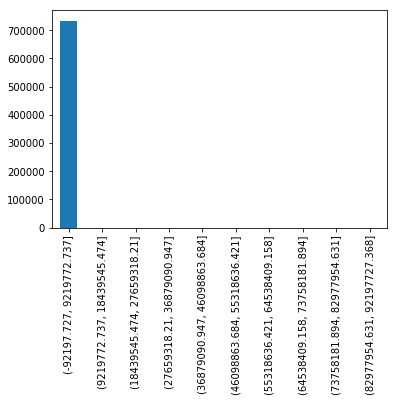

In [36]:
o, bins = pd.cut(tdf["speed"], 10, retbins=True)
o.value_counts(sort=False).plot.bar()

In [37]:
o.value_counts(sort=False)[-10:]

(-92197.727, 9219772.737]       733987
(9219772.737, 18439545.474]         16
(18439545.474, 27659318.21]          2
(27659318.21, 36879090.947]          6
(36879090.947, 46098863.684]         7
(46098863.684, 55318636.421]         0
(55318636.421, 64538409.158]         0
(64538409.158, 73758181.894]         0
(73758181.894, 82977954.631]         0
(82977954.631, 92197727.368]        15
Name: speed, dtype: int64

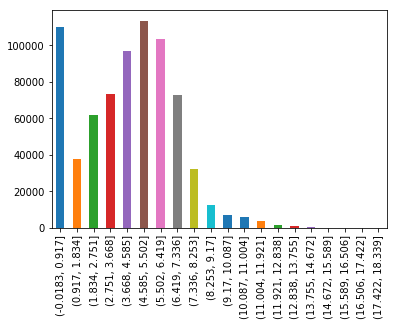

In [29]:
o, bins = pd.cut(np.log(tdf["speed"] + 1), 20, retbins=True)
o.value_counts(sort=False).plot.bar()

In [33]:
print("max speed: " + str(np.log(tdf.speed.max() + 1)))

max speed: 18.339446050130842


In [38]:
print(tdf.acceleration.max(), tdf.acceleration.min())

92178273801.60208 -22724187369.23431


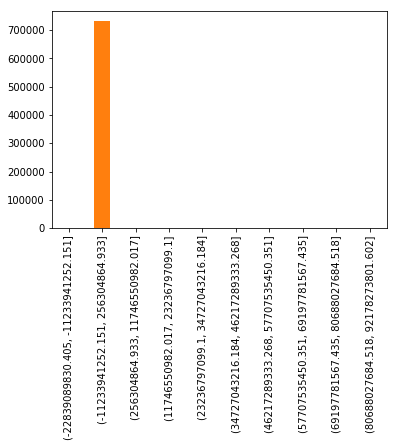

In [39]:
o, bins = pd.cut(tdf["acceleration"], 10, retbins=True)
o.value_counts(sort=False).plot.bar()

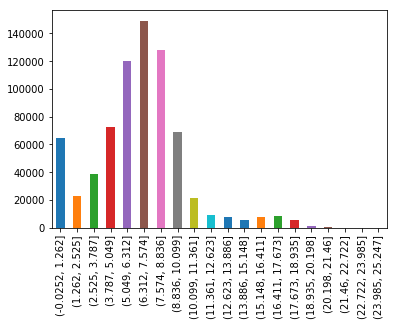

In [40]:
o, bins = pd.cut(np.log(np.abs(tdf["acceleration"]) + 1), 20, retbins=True)
o.value_counts(sort=False).plot.bar()

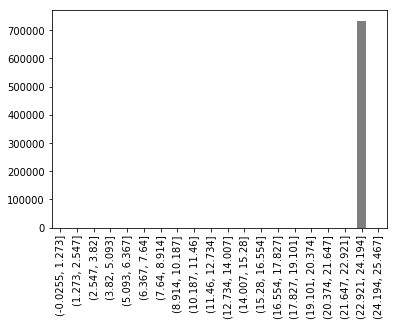

In [41]:
o, bins = pd.cut(np.log(tdf["acceleration"] + 22724187369.23431 + 1), 20, retbins=True)
o.value_counts(sort=False).plot.bar()

In [57]:
def do(x):
    r = np.log(np.abs(x) + 1)
    if x >= 0:
        return r
    else:
        return -r

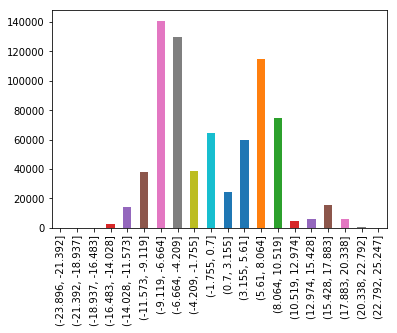

In [87]:
o, bins = pd.cut(tdf["acceleration"].apply(lambda x: do(x)), 20, duplicates='drop', retbins=True)
o.value_counts(sort=False).plot.bar()

In [65]:
acc = tdf["acceleration"].apply(lambda x: do(x))

In [68]:
print(acc.min(), acc.max())

-23.846695717084955 25.2469902976868


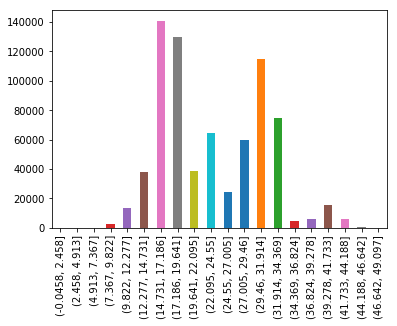

In [86]:
o, bins = pd.cut(acc + 23.85, 20, duplicates='drop', retbins=True)
o.value_counts(sort=False).plot.bar()

In [71]:
23.846695717084955 + 25.2469902976868

49.093686014771755

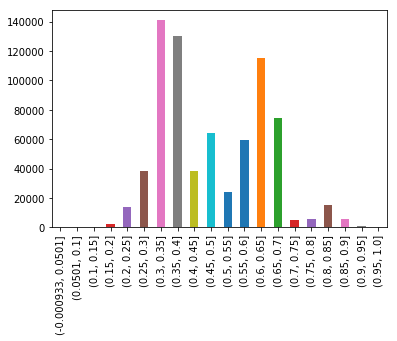

In [85]:
o, bins = pd.cut((acc + 23.85)/49.1, 20, duplicates='drop', retbins=True)
o.value_counts(sort=False).plot.bar()

In [100]:
min_log_acc = 23.85 #log(abs(min) + 1)
# max_log_acc = log(abs(max) + 1)
rng = 49.1 #min_log_acc + min_log_acc

def does(x):
    r = np.log(np.abs(x) + 1)
    if x >= 0:
        return np.divide(min_log_acc + r, rng)
    else:
        return np.divide(min_log_acc - r, rng)

In [101]:
def do(x):
    r = np.log(np.abs(x) + 1)
    if x >= 0:
        return r
    else:
        return -r

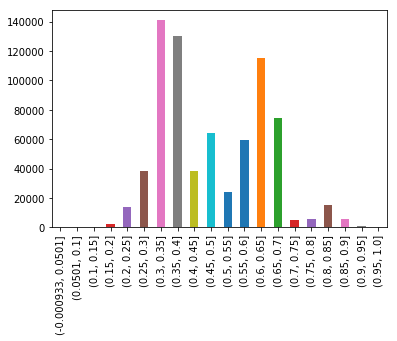

In [102]:
o, bins = pd.cut(tdf["acceleration"].apply(lambda x: does(x)), 20, duplicates='drop', retbins=True)
o.value_counts(sort=False).plot.bar()

In [103]:
tdf["acceleration"].apply(lambda x: does(x)).min()

6.729700437975622e-05